# Uvod #

U vodiču smo vidjeli kako izgraditi duboke neuronske mreže slaganjem slojeva unutar `Sekvencijalnog` modela. Dodavanjem *aktivacijske funkcije* nakon skrivenih slojeva, mreži smo dali mogućnost da nauči složenije (nelinearne) odnose u podacima.

U ovim ćete vježbama izgraditi neuronsku mrežu s nekoliko skrivenih slojeva i zatim istražiti neke aktivacijske funkcije izvan ReLU-a. Pokrenite ovu sljedeću ćeliju da sve postavite!

In [1]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


U skupu podataka *Concrete* vaš je zadatak predvidjeti tlačnu čvrstoću betona proizvedenog prema različitim recepturama.

Pokrenite sljedeću ćeliju koda bez promjena za učitavanje skupa podataka.

In [2]:
import pandas as pd

concrete = pd.read_csv('./input/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1) Ulazni oblik #

Cilj za ovaj zadatak je stupac `'CompressiveStrength'`. Preostali stupci su značajke koje ćemo koristiti kao ulazne podatke.

Kakav bi bio ulazni oblik za ovaj skup podataka?

In [7]:
# Dohvaćanje broja redaka i stupaca podatkovnog okvira
num_rows, num_columns = concrete.shape

# Broj ulaznih značajki (stupaca minus 1)
num_input_features = num_columns - 1

# Postavljanje ulaznog oblika za model
input_shape = (num_input_features,)

print(f"Ulazni oblik za model: {input_shape}")

Ulazni oblik za model: (8,)


# 2) Definirajte model sa skrivenim slojevima #

Sada izradite model s tri skrivena sloja, od kojih svaki ima 512 jedinica i ReLU aktivaciju. Svakako uključite izlazni sloj od jedne jedinice i bez aktivacije, a također i `input_shape` kao argument prvom sloju.

In [8]:
# Import TensorFlow i Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inicijalizacija sekvencijalnog modela
model = Sequential()

# Dodavanje prvog skrivenog sloja s definiranim input_shape i ReLU aktivacijom
model.add(Dense(512, input_shape=input_shape, activation='relu'))

# Dodavanje drugog skrivenog sloja s 512 jedinica i ReLU aktivacijom
model.add(Dense(512, activation='relu'))

# Dodavanje trećeg skrivenog sloja s 512 jedinica i ReLU aktivacijom
model.add(Dense(512, activation='relu'))

# Dodavanje izlaznog sloja s jednom jedinicom i bez aktivacije
model.add(Dense(1, activation=None))

# Ispisivanje sažetka modela
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,433 (2.02 MB)

 Trainable params: 530,433 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

# 3) Aktivacijski slojevi #

Istražimo neke funkcije aktivacije.

Uobičajeni način pripajanja aktivacijske funkcije sloju `Dense` jest uključiti je kao dio definicije s argumentom `activation`. Ponekad ćete ipak htjeti staviti neki drugi sloj između sloja `Dense` i njegove aktivacijske funkcije. (Vidjet ćemo primjer ovoga kasnije.) U ovom slučaju, možemo definirati aktivaciju u vlastitom sloju `Aktivacija`, ovako:

```
layers.Dense(units=8),
layers.Activation('relu')
```

Ovo je potpuno ekvivalentno uobičajenom načinu: `layers.Dense(units=8, activation='relu')`.

Prepišite sljedeći model tako da svaka aktivacija bude u vlastitom sloju `Activation`.

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# Prepravljeni model s aktivacijama u zasebnim slojevima
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1)
])


# Izborno: Alternative za ReLU #

Postoji cijela obitelj varijanti aktivacije `'relu'` -- `'elu'`, `'selu'`, i `'swish'`, između ostalih -- koje sve možete koristiti u Kerasu. Ponekad će jedna aktivacija biti bolja od druge na određenom zadatku, pa biste mogli razmisliti o eksperimentiranju s aktivacijama dok razvijate model. ReLU aktivacija ima tendenciju da dobro funkcionira na većini problema, tako da je dobra za početak.

Pogledajmo grafikone nekih od njih. Promijenite aktivaciju iz `'relu'` u jednu od ostalih gore navedenih. Zatim pokrenite ćeliju da vidite grafikon. (Provjerite [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) za više ideja.)

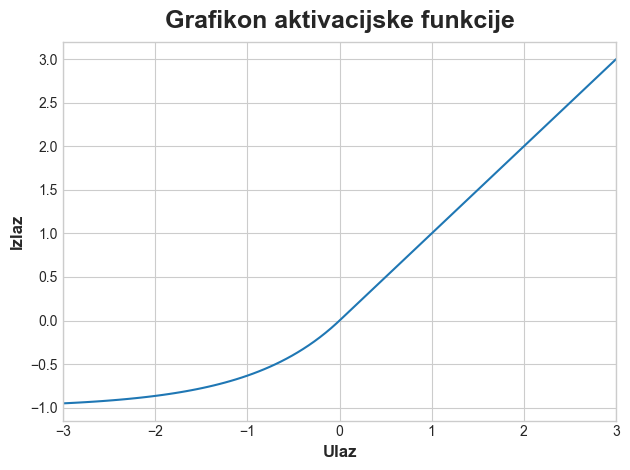

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Promijenite 'relu' u 'elu', 'selu', 'swish'... ili nešto drugo
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x)  # Jednom kada se sloj stvori, može se koristiti kao funkcija

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Ulaz")
plt.ylabel("Izlaz")
plt.title("Grafikon aktivacijske funkcije")
plt.show()


# Dalje #

Sada prijeđite na sljedeću lekciju [**naučite kako istrenirati neuralnu mrežu**](Stochastic_Gradient_Descent_hr.ipynb) sa stohastičkim gradijentnim spuštanjem.